In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
#Links :
# https://www.kaggle.com/code/marcinrutecki/outlier-detection-methods
# https://www.kaggle.com/code/nareshbhat/outlier-the-silent-killer
# https://www.kaggle.com/code/currie32/predicting-fraud-with-tensorflow
# https://www.kaggle.com/code/gpreda/credit-card-fraud-detection-predictive-models
# https://www.kaggle.com/code/pavansanagapati/automated-hyperparameter-tuning
#https://www.kaggle.com/code/joparga3/in-depth-skewed-data-classif-93-recall-acc-now

### Importing Data + First look

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<Axes: xlabel='Class', ylabel='count'>

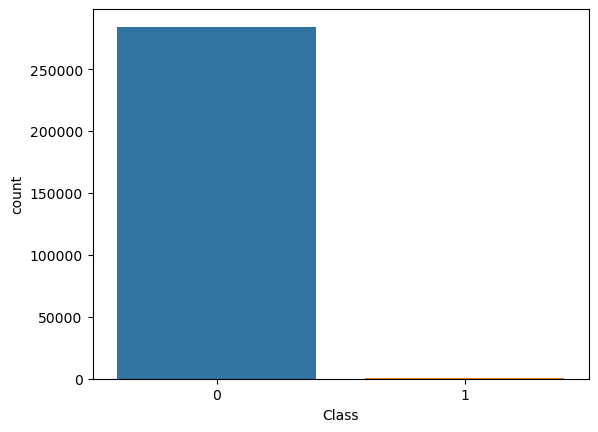

In [4]:
sns.countplot(data = df , x = 'Class')

In [5]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

<Axes: xlabel='Class', ylabel='V2'>

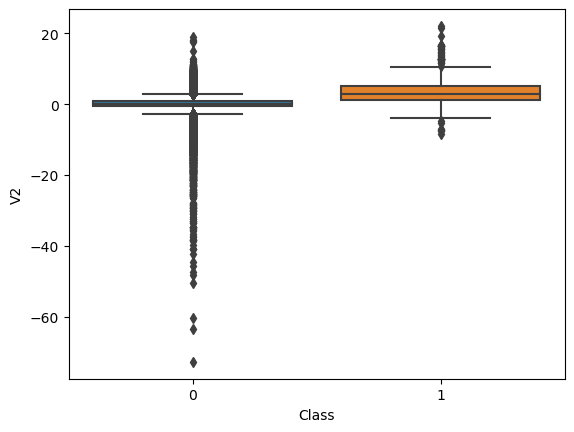

In [6]:
sns.boxplot(data = df , x = 'Class' , y = 'V2')

# Dealing with Outliers

# NEXT STEP :
    Find oultiers in R^30
    Determine the probabily law of the distributionof each feature or for for all features in the R^30
    

In [7]:
df.corr()['Class'].abs().sort_values()

V22       0.000805
V23       0.002685
V25       0.003308
V15       0.004223
V26       0.004455
V13       0.004570
Amount    0.005632
V24       0.007221
V28       0.009536
Time      0.012323
V27       0.017580
V8        0.019875
V20       0.020090
V19       0.034783
V21       0.040413
V6        0.043643
V2        0.091289
V5        0.094974
V9        0.097733
V1        0.101347
V18       0.111485
V4        0.133447
V11       0.154876
V7        0.187257
V3        0.192961
V16       0.196539
V10       0.216883
V12       0.260593
V14       0.302544
V17       0.326481
Class     1.000000
Name: Class, dtype: float64

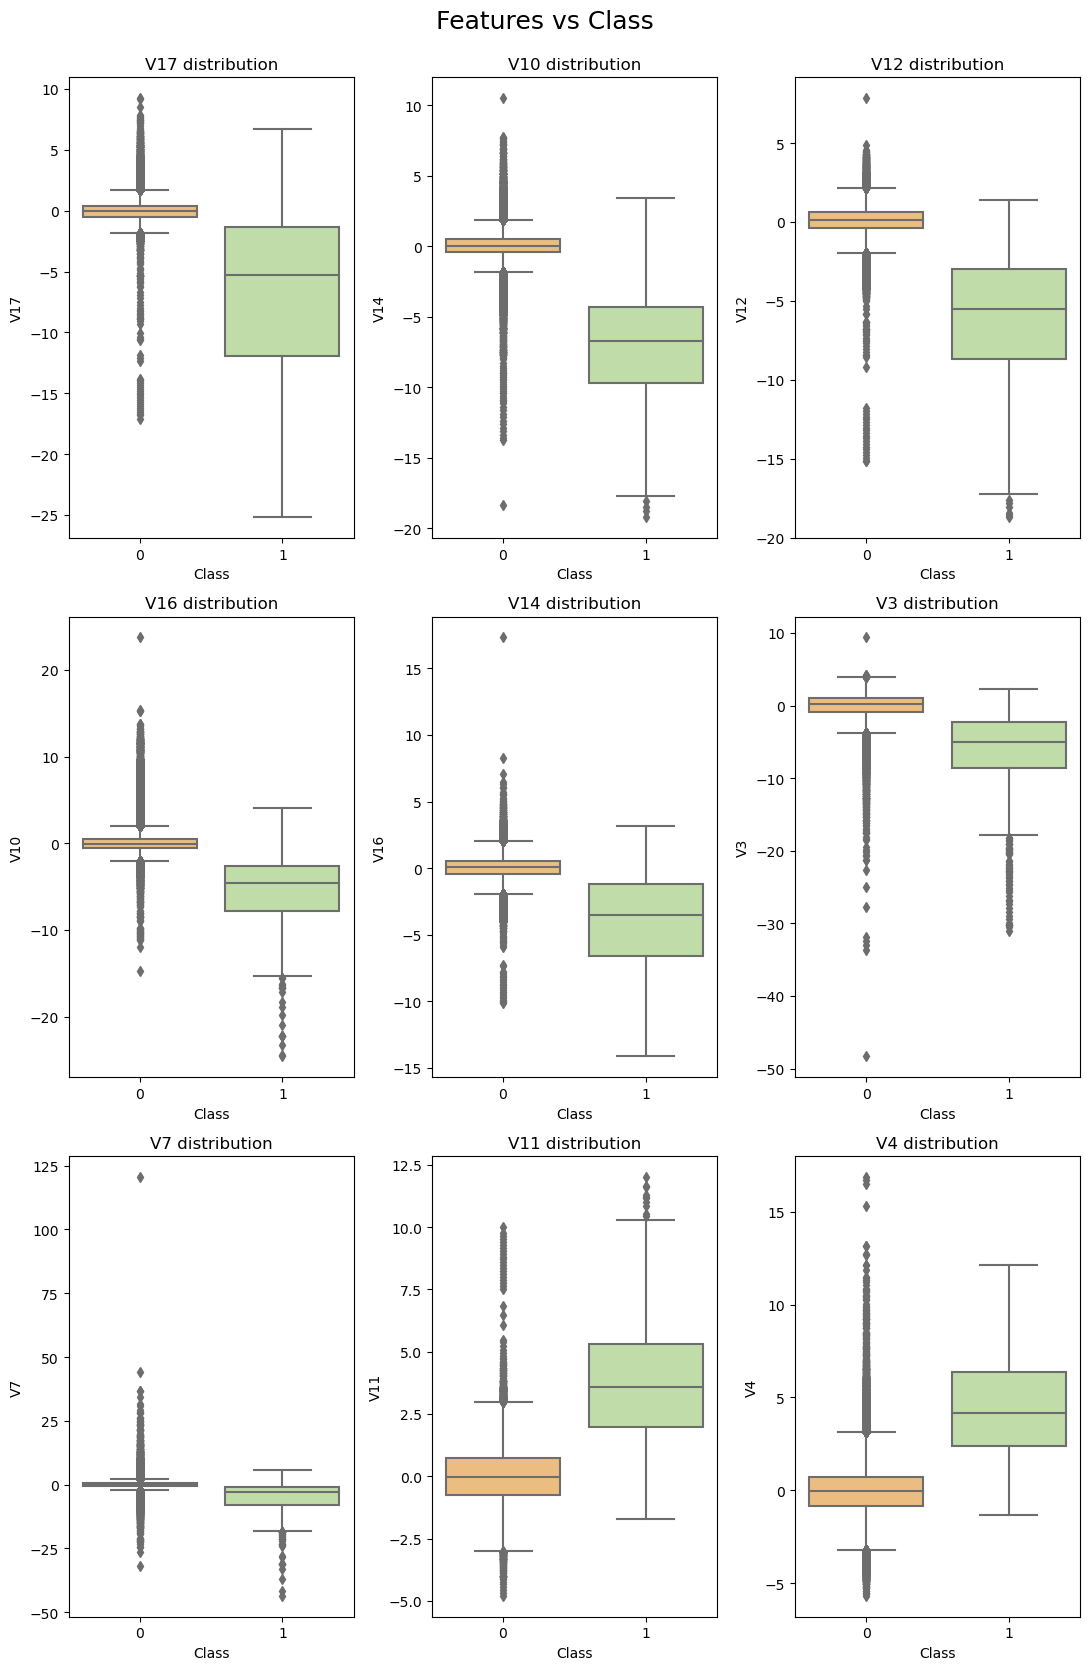

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(11,17))
fig.suptitle('Features vs Class\n', size = 18)

sns.boxplot(ax=axes[0, 0], data=df, x='Class', y='V17', palette='Spectral')
axes[0,0].set_title("V17 distribution");

sns.boxplot(ax=axes[0, 1], data=df, x='Class', y='V14', palette='Spectral')
axes[0,1].set_title("V10 distribution");

sns.boxplot(ax=axes[0, 2], data=df, x='Class', y='V12', palette='Spectral')
axes[0,2].set_title("V12 distribution");

sns.boxplot(ax=axes[1, 0], data=df, x='Class', y='V10', palette='Spectral')
axes[1,0].set_title("V16 distribution");

sns.boxplot(ax=axes[1, 1], data=df, x='Class', y='V16', palette='Spectral')
axes[1,1].set_title("V14 distribution");

sns.boxplot(ax=axes[1, 2], data=df, x='Class', y='V3', palette='Spectral')
axes[1,2].set_title("V3 distribution");

sns.boxplot(ax=axes[2, 0], data=df, x='Class', y='V7', palette='Spectral')
axes[2,0].set_title("V7 distribution");

sns.boxplot(ax=axes[2, 1], data=df, x='Class', y='V11', palette='Spectral')
axes[2,1].set_title("V11 distribution");

sns.boxplot(ax=axes[2, 2], data=df, x='Class', y='V4', palette='Spectral')
axes[2,2].set_title("V4 distribution");

plt.tight_layout()

####      IQR method 

In [9]:
df['V2'].quantile(0.25)

-0.598549913464916

In [10]:
dg=df.copy()

In [11]:
dg[dg['Class']==1].count()

Time      492
V1        492
V2        492
V3        492
V4        492
V5        492
V6        492
V7        492
V8        492
V9        492
V10       492
V11       492
V12       492
V13       492
V14       492
V15       492
V16       492
V17       492
V18       492
V19       492
V20       492
V21       492
V22       492
V23       492
V24       492
V25       492
V26       492
V27       492
V28       492
Amount    492
Class     492
dtype: int64

In [12]:
len(dg)

284807

In [13]:
#outlier_mask = dg.apply(lambda row: row > df.quantile(0.25), axis=1)

In [14]:
#dg = dg[(dg['V2']>dg['V2'].quantile(0.25))&(dg['V2']<dg['V2'].quantile(0.75))]

In [15]:
dg[dg['Class']==1].count()

Time      492
V1        492
V2        492
V3        492
V4        492
V5        492
V6        492
V7        492
V8        492
V9        492
V10       492
V11       492
V12       492
V13       492
V14       492
V15       492
V16       492
V17       492
V18       492
V19       492
V20       492
V21       492
V22       492
V23       492
V24       492
V25       492
V26       492
V27       492
V28       492
Amount    492
Class     492
dtype: int64

<Axes: xlabel='Class', ylabel='V2'>

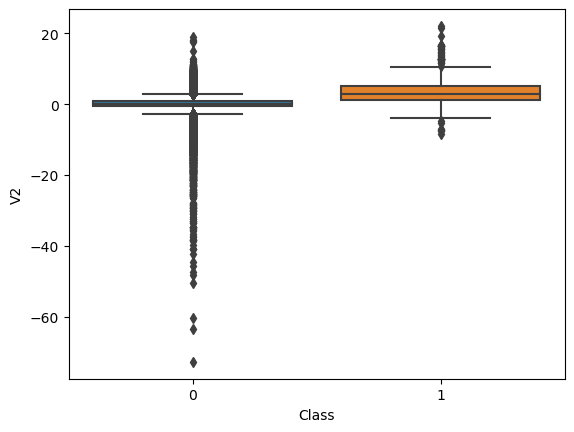

In [16]:
sns.boxplot(data = dg , x = 'Class' , y = 'V2')

Conclusion :
    We lose too much info

### Winsorization Method(Percentile Capping)

In [17]:
dg_1 = df.copy()

In [18]:
q1 = np.percentile(df['V2'] , 1)

In [19]:
q1

-4.960299775870282

In [20]:
out=[]
def Winsorization_outliers(df):
    q1 = np.percentile(df , 1)
    q3 = np.percentile(df , 99)
    for i in df:
        if i > q3 or i < q1:
            out.append(i)
    print("Outliers:",out)

In [21]:
#win_outlier_mask = dg_1.apply(lambda row: row < np.percentile(row,1), axis=1)

In [22]:
#win_outlier_mask.sum()

In [23]:
#dg_1 = dg_1[win_outlier_mask.all(axis=1)]

In [24]:
#dg_1.shape

###  Standard deviation method


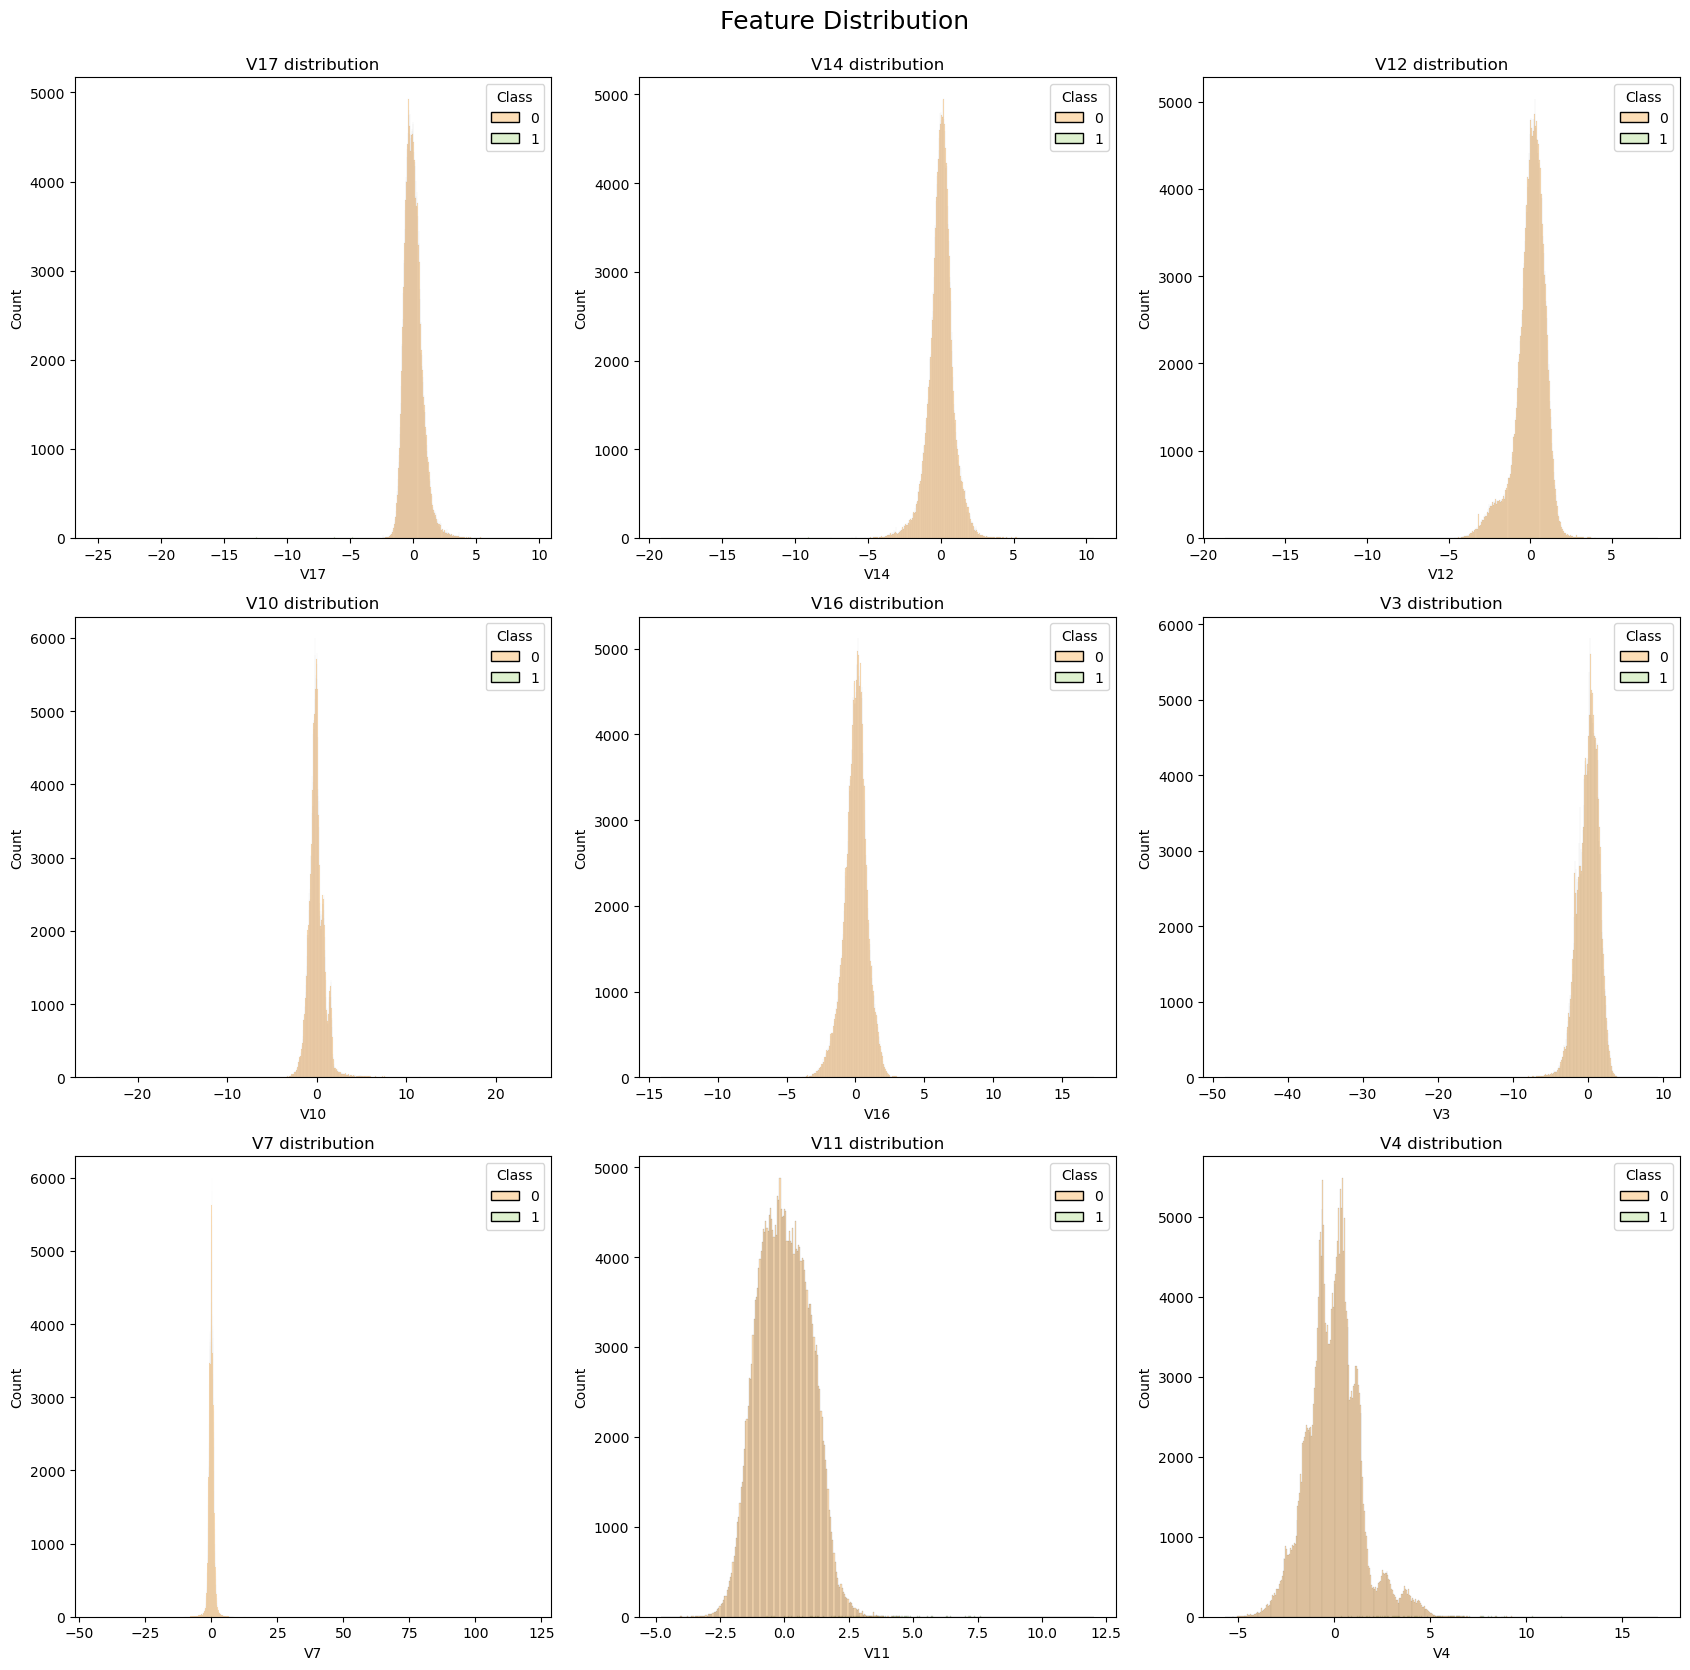

In [25]:
fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(17,17))
fig.suptitle('Feature Distribution\n', size = 18)

sns.histplot(ax=axes[0, 0], data=df, x='V17', hue='Class' , palette='Spectral')
axes[0,0].set_title("V17 distribution");

sns.histplot(ax=axes[0, 1], data=df, x='V14', hue='Class' , palette='Spectral')
axes[0,1].set_title("V14 distribution");

sns.histplot(ax=axes[0, 2], data=df, x='V12', hue='Class' ,palette='Spectral')
axes[0,2].set_title("V12 distribution");

sns.histplot(ax=axes[1, 0], data=df, x='V10', hue='Class' ,palette='Spectral')
axes[1,0].set_title("V10 distribution");

sns.histplot(ax=axes[1, 1], data=df, x='V16',hue='Class' , palette='Spectral')
axes[1,1].set_title("V16 distribution");

sns.histplot(ax=axes[1, 2], data=df, x='V3',hue='Class' , palette='Spectral')
axes[1,2].set_title("V3 distribution");

sns.histplot(ax=axes[2, 0], data=df, x='V7',hue='Class' , palette='Spectral')
axes[2,0].set_title("V7 distribution");

sns.histplot(ax=axes[2, 1], data=df, x='V11',hue='Class' , palette='Spectral')
axes[2,1].set_title("V11 distribution");

sns.histplot(ax=axes[2, 2], data=df, x='V4',hue='Class' , palette='Spectral')
axes[2,2].set_title("V4 distribution");

plt.tight_layout()

In [26]:
# -> Define a function that takes a dataset, a number representing an amount of rows to be dropped 

In [27]:
m = df['V17'].mean()
v = np.sqrt(df['V17'].var())

In [28]:
min_17 = m - 3*v

In [29]:
max_17 = m + 3*v

In [30]:
df['V17'].min()

-25.1627993693248

In [31]:
df['V17'].sort_values().abs()

42473    25.162799
42609    24.019099
42528    23.815636
42674    23.241597
42635    22.883999
           ...    
13450     7.766636
9512      7.893393
10573     8.538195
10804     9.207059
10900     9.253526
Name: V17, Length: 284807, dtype: float64

In [32]:
min_17

-2.5480111910231393

In [33]:
len(df)

284807

In [34]:
def std_outlier(df,n):
    outliers_index = []
    for i in df.columns:
        m = df[i].mean()
        v = np.sqrt(df[i].var())
        outliers_index = df[i].where(df[i]<min_17).dropna().index.append(df[i].where(df[i]>max_17).dropna()
                                                                         .index)
        drop_index = []
        for k in range(0,int(n/2)):
            drop_index.append(outliers_index[k])
            drop_index.append(outliers_index[len(outliers_index)-k])
            

In [35]:
df['V17'].where(df['V17']<min_17).dropna().index.append(df['V17'].where(df['V17']>max_17).dropna().index)

Int64Index([   460,    472,    541,   2016,   4895,   4920,   6108,   6427,
              6446,   6529,
            ...
            282806, 282836, 282846, 282863, 282881, 282883, 282903, 282945,
            283630, 284631],
           dtype='int64', length=2515)

In [36]:
((df['V17']>min_17)==False)

0         False
1         False
2         False
3         False
4         False
          ...  
284802    False
284803    False
284804    False
284805    False
284806    False
Name: V17, Length: 284807, dtype: bool

In [37]:
#df[(df['V17']>min_17) & (df[df['V17']<max_17])]

In [38]:
z_scores_df = (df - df.mean()) / df.std()


In [39]:
threshold = 3
outliers_df = df[(z_scores_df > threshold) | (z_scores_df < -threshold)]


In [40]:
outliers_df.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,True,False,False,False,True,False,True,False,False,True,...,True,True,True,True,True,True,True,True,True,True
284803,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
284804,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
284805,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [41]:
from sklearn.neighbors import LocalOutlierFactor

In [42]:
lof_model = LocalOutlierFactor(n_neighbors=20, contamination=0.05) # You can adjust n_neighbors and contamination based on your data and requirements

In [43]:
outlier_scores = lof_model.fit_predict(df)

In [44]:
outliers_df = df[outlier_scores == -1]

In [45]:
type(df.corr()['Class'])

pandas.core.series.Series

In [46]:
df.corr()['Class'].abs().sort_values()

V22       0.000805
V23       0.002685
V25       0.003308
V15       0.004223
V26       0.004455
V13       0.004570
Amount    0.005632
V24       0.007221
V28       0.009536
Time      0.012323
V27       0.017580
V8        0.019875
V20       0.020090
V19       0.034783
V21       0.040413
V6        0.043643
V2        0.091289
V5        0.094974
V9        0.097733
V1        0.101347
V18       0.111485
V4        0.133447
V11       0.154876
V7        0.187257
V3        0.192961
V16       0.196539
V10       0.216883
V12       0.260593
V14       0.302544
V17       0.326481
Class     1.000000
Name: Class, dtype: float64

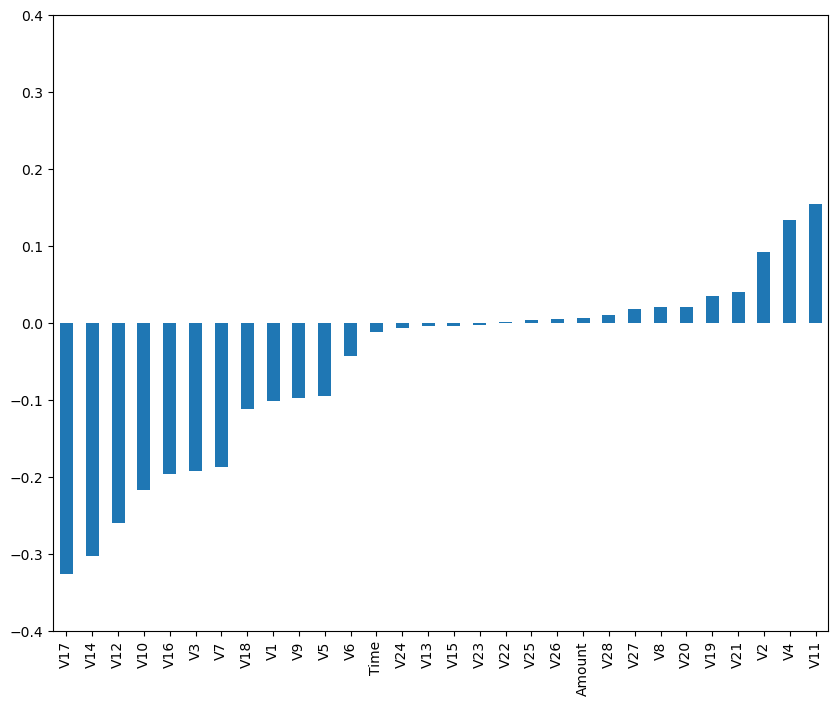

In [47]:
plt.figure(figsize=(10,8))
df.corr()['Class'].drop('Class').sort_values().plot(kind='bar')
plt.ylim(-0.4,0.4);

### Preprocessing

#### Split Input / Target

In [48]:
X = df.drop('Class',axis=1)
y = df['Class']

#### Split Train/test + Normalization

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
sc = StandardScaler()

In [53]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [54]:
X_train[:,0].shape

(190820,)

In [55]:
#plt.figure(figsize=(15,10))
#sns.kdeplot(data = [X_train[:,i] for i in range(0,30)])

In [56]:
#sns.pairplot(data = df , hue = 'Class')

# Models

## Logistic regression

##### Standard Hyper-parameters

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
log_model = LogisticRegression()

In [59]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 's

In [60]:
log_model.fit(X_train,y_train)

LogisticRegression()

In [61]:
from sklearn.metrics import ConfusionMatrixDisplay , classification_report

In [62]:
y_pred = log_model.predict(X_test)

In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93838
           1       0.87      0.64      0.74       149

    accuracy                           1.00     93987
   macro avg       0.94      0.82      0.87     93987
weighted avg       1.00      1.00      1.00     93987



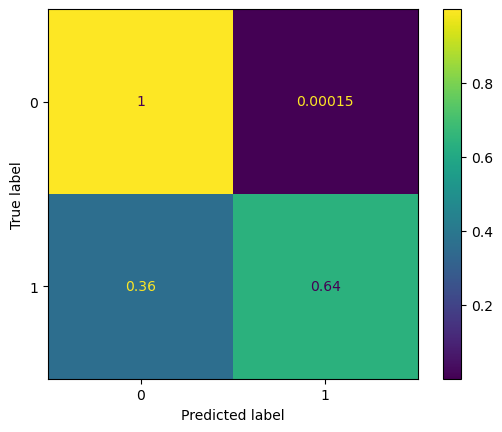

In [64]:
ConfusionMatrixDisplay.from_estimator(log_model,X_test,y_test,normalize='true')

##### Adjusting for Hyper-parameters

    .  Balancing Dataset

In [65]:
log_model = LogisticRegression(penalty = 'l2' , class_weight = 'balanced')

In [66]:
log_model.fit(X_train,y_train)

LogisticRegression(class_weight='balanced')

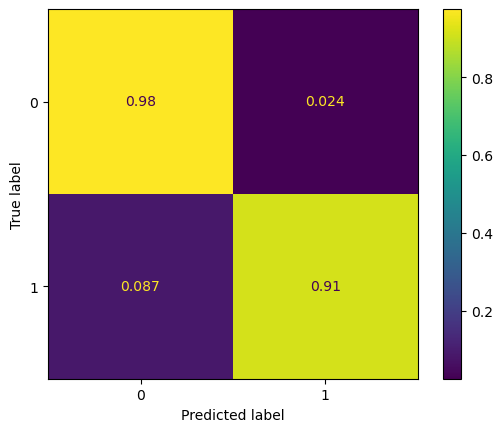

In [67]:
ConfusionMatrixDisplay.from_estimator(log_model,X_test,y_test,normalize='true')

    . GridSearch 

In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
model = LogisticRegression()

In [70]:
C = np.logspace(0, 4, 10)
penalty = ['l1', 'l2', 'elasticnet', None]
class_weight = ['balanced']
l1_ratio =[1,0,0.1,None]

In [71]:
param_grid = { 'C' : C ,
              'penalty' : penalty ,
              'class_weight' : class_weight ,
              'l1_ratio' : l1_ratio
}

In [72]:
best_log = GridSearchCV(model,param_grid)

In [73]:
best_log.fit(X_train , y_train)

C:\Users\yacin\anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\yacin\anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\yacin\anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\yacin\anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\yacin\anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when

C:\Users\yacin\anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
C:\Users\yacin\anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\yacin\anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
C:\Users\yacin\anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\yacin\anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Go

C:\Users\yacin\anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\yacin\anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\yacin\anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\yacin\anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\yacin\anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'ela

C:\Users\yacin\anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
C:\Users\yacin\anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\yacin\anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
C:\Users\yacin\anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\yacin\anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Go

C:\Users\yacin\anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\yacin\anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\yacin\anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\yacin\anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\yacin\anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when

C:\Users\yacin\anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
C:\Users\yacin\anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\yacin\anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
C:\Users\yacin\anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\yacin\anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Go

C:\Users\yacin\anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
C:\Users\yacin\anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\yacin\anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
C:\Users\yacin\anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\yacin\anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Go

C:\Users\yacin\anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\yacin\anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\yacin\anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\yacin\anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\yacin\anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when

C:\Users\yacin\anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
C:\Users\yacin\anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\yacin\anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
C:\Users\yacin\anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\yacin\anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
 

C:\Users\yacin\anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\yacin\anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\yacin\anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\yacin\anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\yacin\anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when

C:\Users\yacin\anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
C:\Users\yacin\anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\yacin\anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
C:\Users\yacin\anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\yacin\anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Go

C:\Users\yacin\anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
C:\Users\yacin\anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\yacin\anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\yacin\anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\yacin\anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'e

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'class_weight': ['balanced'],
                         'l1_ratio': [1, 0, 0.1, None],
                         'penalty': ['l1', 'l2', 'elasticnet', None]})

In [74]:
best_log.best_params_

{'C': 1.0, 'class_weight': 'balanced', 'l1_ratio': 1, 'penalty': None}

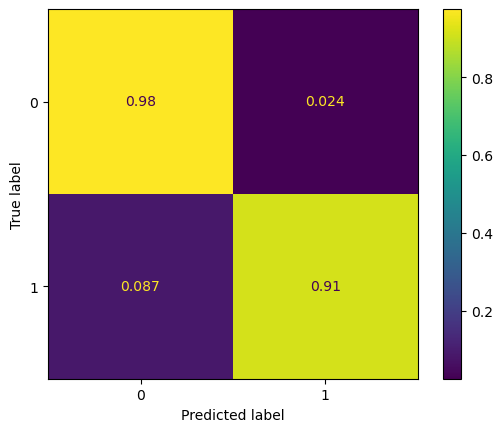

In [75]:
ConfusionMatrixDisplay.from_estimator(best_log,X_test,y_test,normalize='true')

## Random Forest Classifier 

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
#rfc = RandomForestClassifier(n_estimators = 50,max_features = 5)

In [78]:
#rfc.fit(X_train , y_train)

In [79]:
#ConfusionMatrixDisplay.from_estimator(rfc,X_test,y_test)

In [80]:
#y_pred = rfc.predict(X_test)

In [81]:
#print(classification_report(y_test,y_pred))

In [82]:
rfc = RandomForestClassifier(n_estimators = 100, max_features = 5)

In [83]:
rfc.fit(X_train , y_train)

RandomForestClassifier(max_features=5)

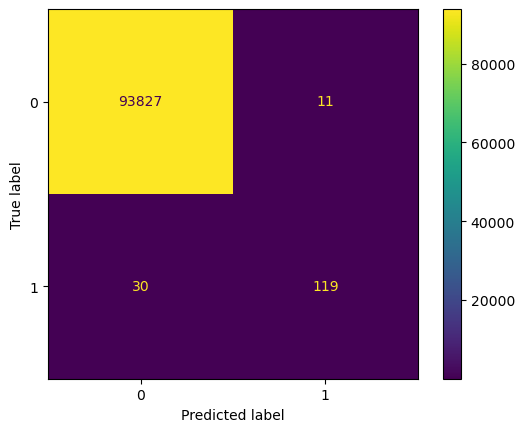

In [84]:
ConfusionMatrixDisplay.from_estimator(rfc,X_test,y_test)

In [85]:
#pd.DataFrame(data = rfc.feature_importances_ , 
#             index = X.columns , columns = ['Feature Importance']).sort_values('Feature Importance')

In [86]:
feat = pd.DataFrame(index = X.columns , data = rfc.feature_importances_ , columns = ['Importance'])

In [87]:
important_feat = feat[feat['Importance']>0]

In [88]:
#important_feat.sort_values('Importance')

In [89]:
#sns.barplot(data = important_feat.sort_values('Importance'), x = important_feat.sort_values('Importance').index, y = 'Importance')
#plt.xticks(rotation = 90);

#### Adjusting for Hyper Parameters

     . GridSearch rfc

In [90]:
from sklearn.model_selection import GridSearchCV

In [91]:
n_estimators=[64, 100]
max_features= [2, 4]

In [92]:
param_grid = {'n_estimators': n_estimators,
             'max_features': max_features
             } 

In [93]:
#grid = GridSearchCV(rfc , param_grid)

In [94]:
#grid.fit(X_train , y_train)

## ANN

In [95]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [96]:
ann = Sequential()

In [97]:
X_train[0].shape

(30,)

In [98]:
ann.add(Dense(30,activation = 'relu',input_shape = (30,)))
ann.add(Dropout(0.2))
ann.add(Dense(64,activation = 'relu'))
ann.add(Dropout(0.2))
ann.add(Dense(128,activation = 'relu'))
ann.add(Dense(1,activation = 'sigmoid'))

In [99]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                930       
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                1984      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 11,363
Trainable params: 11,363
Non-traina

In [100]:
ann.compile(optimizer = 'adam' ,loss = 'binary_crossentropy', metrics= ['accuracy'])

In [101]:
ann.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

Epoch 1/5
5964/5964 [==============================] - 27s 4ms/step - loss: 0.0087 - accuracy: 0.9990 - val_loss: 0.0029 - val_accuracy: 0.9994
Epoch 2/5
5964/5964 [==============================] - 26s 4ms/step - loss: 0.0039 - accuracy: 0.9993 - val_loss: 0.0028 - val_accuracy: 0.9994
Epoch 3/5
5964/5964 [==============================] - 27s 5ms/step - loss: 0.0036 - accuracy: 0.9993 - val_loss: 0.0033 - val_accuracy: 0.9994
Epoch 4/5
5964/5964 [==============================] - 28s 5ms/step - loss: 0.0039 - accuracy: 0.9993 - val_loss: 0.0026 - val_accuracy: 0.9994
Epoch 5/5
5964/5964 [==============================] - 28s 5ms/step - loss: 0.0038 - accuracy: 0.9993 - val_loss: 0.0029 - val_accuracy: 0.9994


In [102]:
y_pred = ann.predict(X_test)

2938/2938 [==============================] - 3s 1ms/step


In [103]:
y_pred = (y_pred>0.5)

In [104]:
y_pred

array([[ True],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [105]:
y_test

43428     1
49906     0
29474     0
276481    0
278846    0
         ..
211399    0
245040    0
97433     0
94007     0
176304    0
Name: Class, Length: 93987, dtype: int64

In [106]:
from sklearn.metrics import confusion_matrix

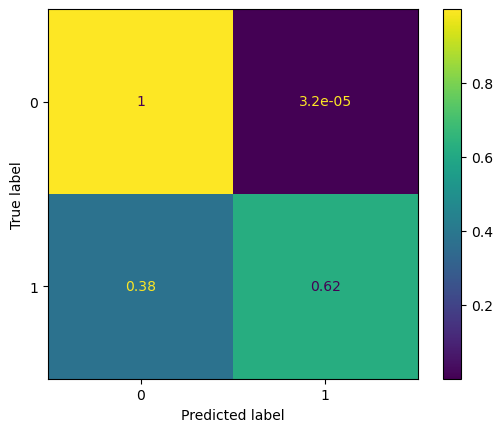

In [107]:
ConfusionMatrixDisplay.from_predictions(y_test , y_pred,normalize='true')

#### Dealing with Imbalanced Dataset

Under Sampling

In [108]:
from imblearn.under_sampling import RandomUnderSampler

In [109]:
rus = RandomUnderSampler(sampling_strategy='all', random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)

<Axes: >

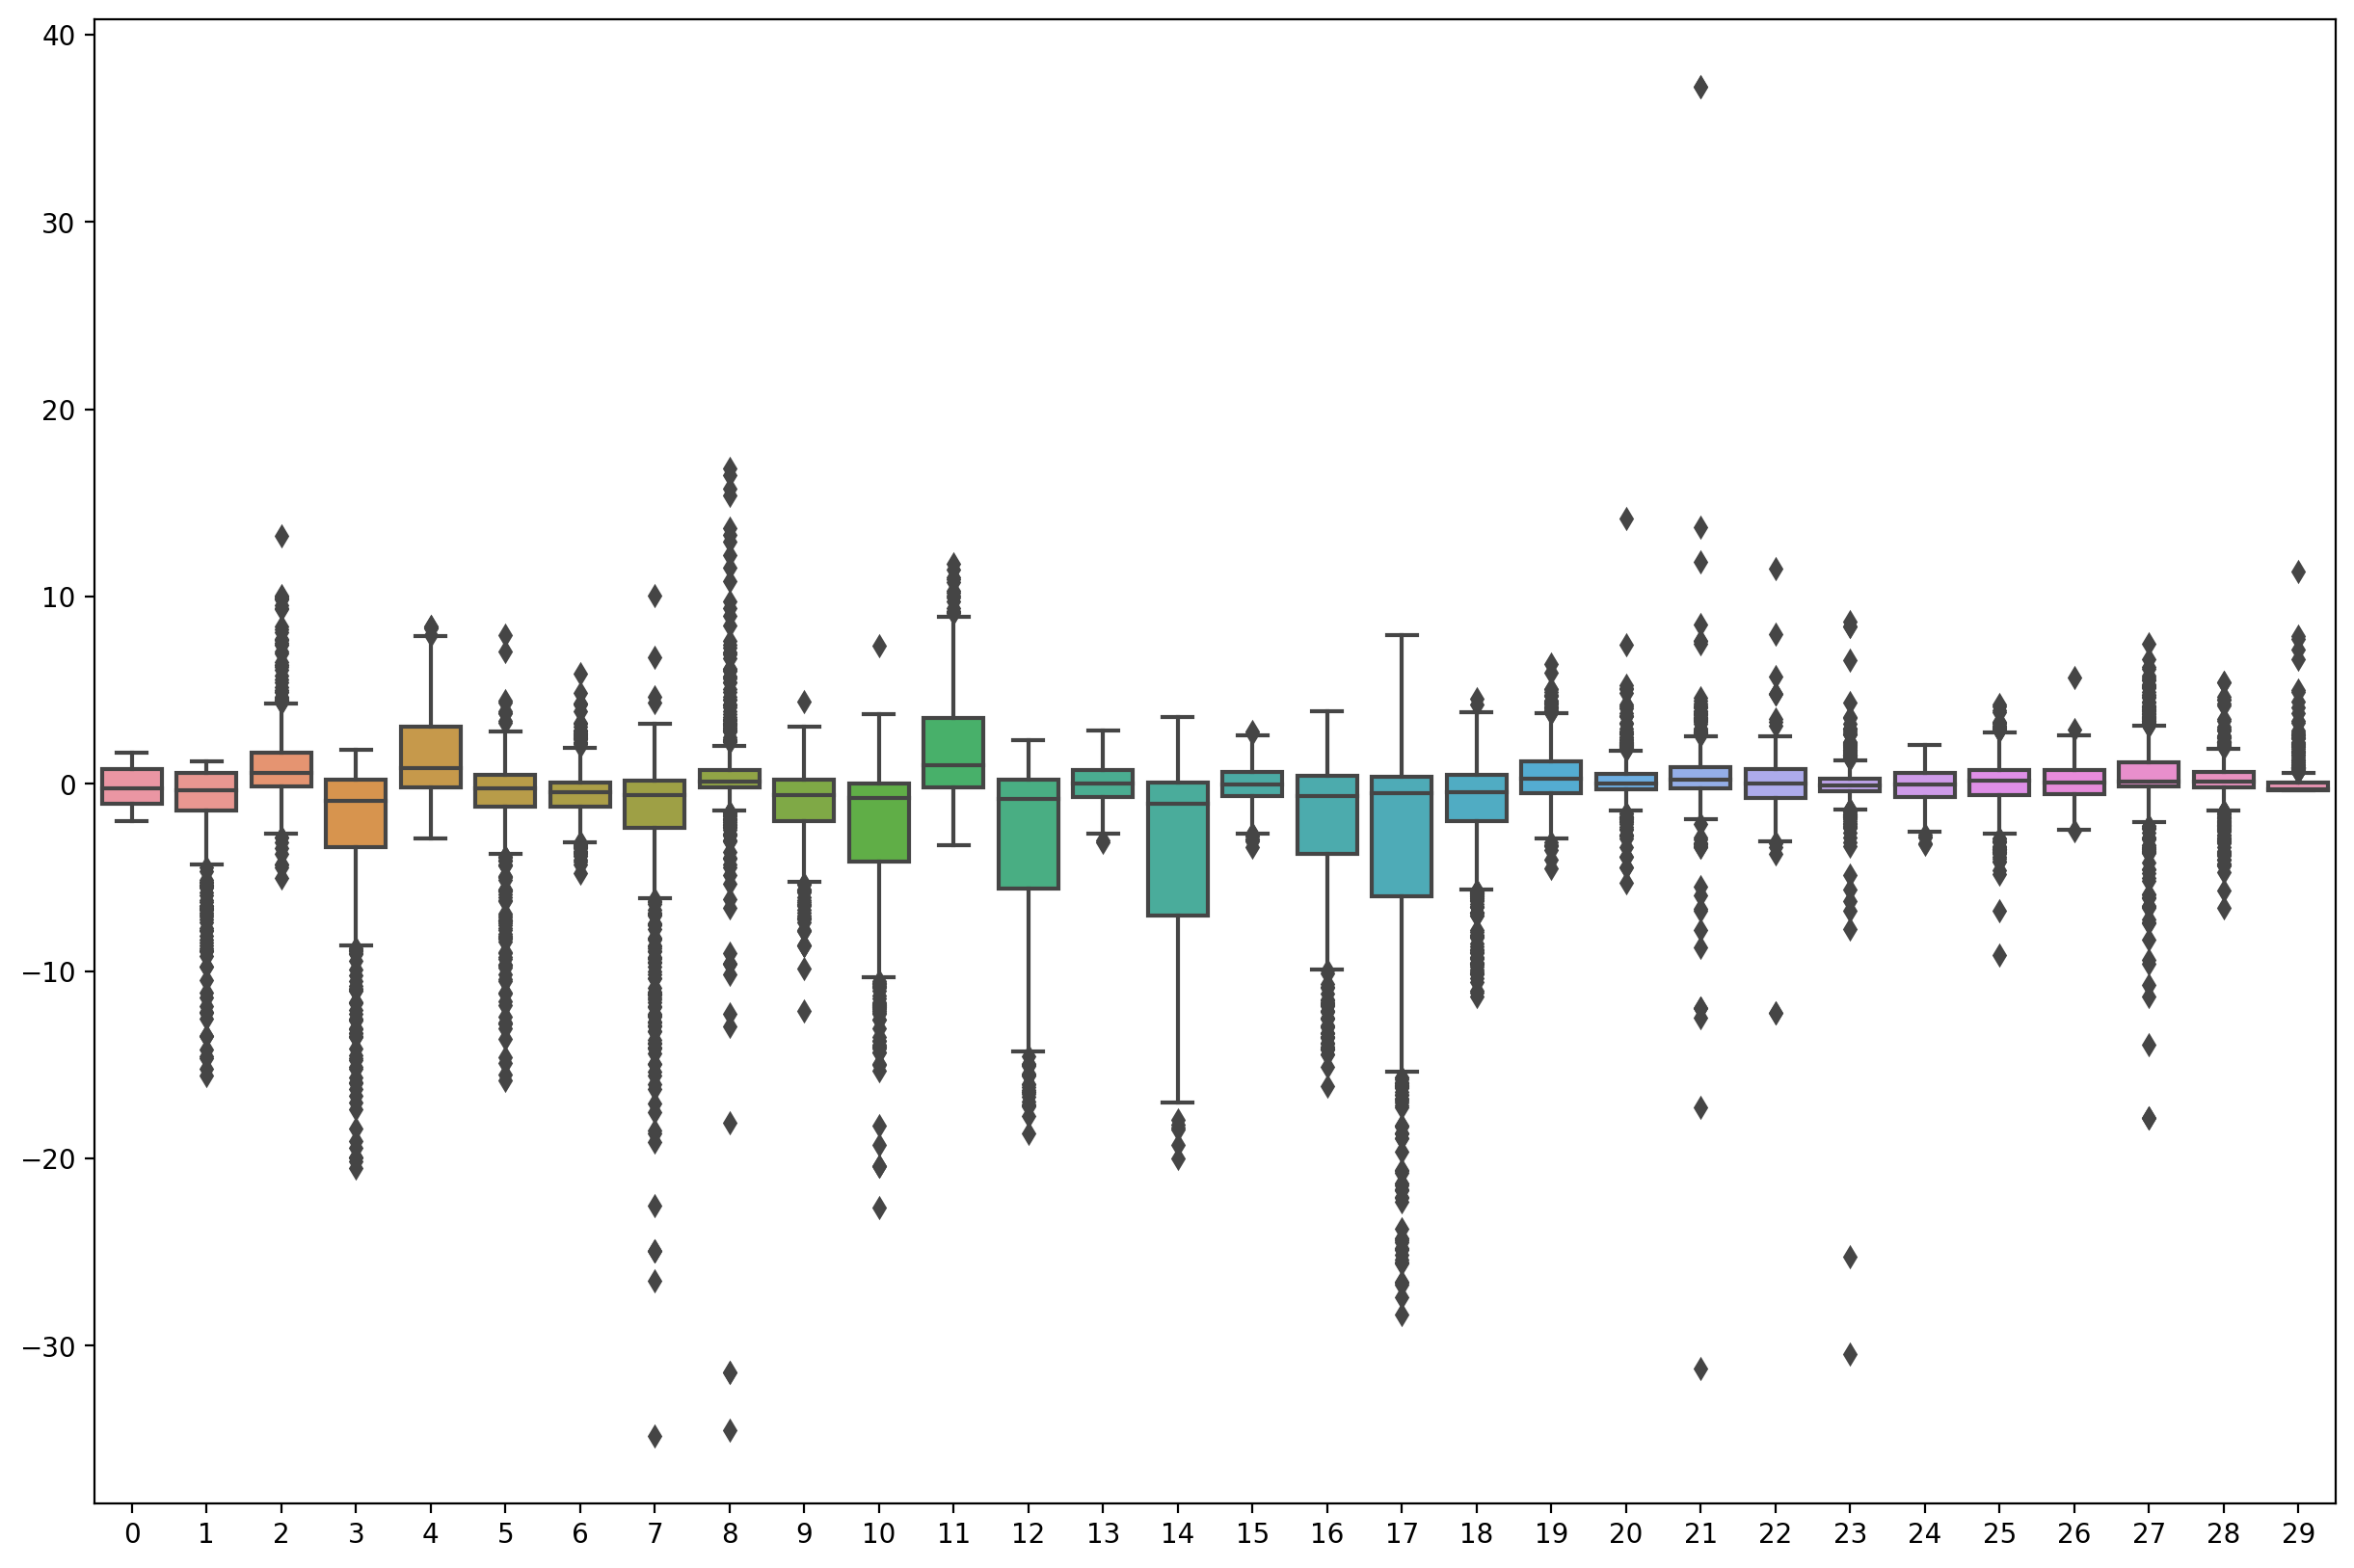

In [110]:
plt.figure(figsize=(15,10),dpi=200)
sns.boxplot(X_res)

In [111]:
ann = Sequential()
ann.add(Dense(30,activation = 'relu',input_shape = (30,)))
ann.add(Dropout(0.2))
ann.add(Dense(64,activation = 'relu'))
ann.add(Dropout(0.2))
ann.add(Dense(128,activation = 'relu'))
ann.add(Dense(1,activation = 'sigmoid'))

In [112]:
ann.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 30)                930       
                                                                 
 dropout_2 (Dropout)         (None, 30)                0         
                                                                 
 dense_5 (Dense)             (None, 64)                1984      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 128)               8320      
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 11,363
Trainable params: 11,363
Non-trai

In [113]:
ann.compile(optimizer = 'adam' ,loss = 'binary_crossentropy', metrics= ['accuracy'])

In [114]:
ann.fit(X_res,y_res,epochs=20,validation_data=(X_test,y_test))

Epoch 1/20
22/22 [==============================] - 6s 269ms/step - loss: 0.4533 - accuracy: 0.7536 - val_loss: 0.4274 - val_accuracy: 0.9897
Epoch 2/20
22/22 [==============================] - 5s 258ms/step - loss: 0.3118 - accuracy: 0.9096 - val_loss: 0.3309 - val_accuracy: 0.9734
Epoch 3/20
22/22 [==============================] - 6s 270ms/step - loss: 0.2564 - accuracy: 0.9242 - val_loss: 0.2099 - val_accuracy: 0.9781
Epoch 4/20
22/22 [==============================] - 5s 261ms/step - loss: 0.2025 - accuracy: 0.9257 - val_loss: 0.1777 - val_accuracy: 0.9664
Epoch 5/20
22/22 [==============================] - 5s 257ms/step - loss: 0.1700 - accuracy: 0.9417 - val_loss: 0.1380 - val_accuracy: 0.9689
Epoch 6/20
22/22 [==============================] - 5s 261ms/step - loss: 0.1539 - accuracy: 0.9461 - val_loss: 0.1790 - val_accuracy: 0.9478
Epoch 7/20
22/22 [==============================] - 5s 257ms/step - loss: 0.1626 - accuracy: 0.9388 - val_loss: 0.1353 - val_accuracy: 0.9632
Epoch 

In [115]:
y_pred = ann.predict(X_test)

2938/2938 [==============================] - 3s 1ms/step


In [116]:
y_pred = (y_pred>0.5)

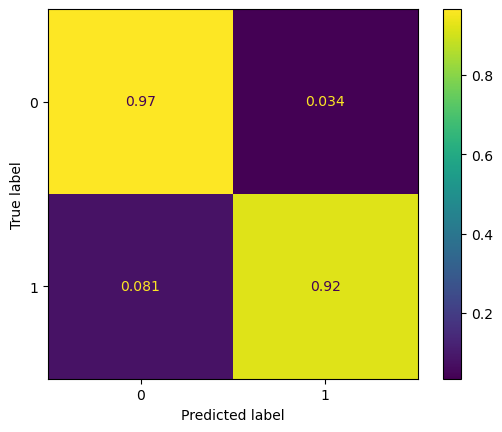

In [117]:
ConfusionMatrixDisplay.from_predictions(y_test , y_pred,normalize='true')

## AdaBoosting

#### Base AdaBoost

Balanced Dataset

In [118]:
from sklearn.ensemble import AdaBoostClassifier

In [119]:
abc = AdaBoostClassifier()

In [120]:
#help(AdaBoostClassifier)

In [121]:
abc.fit(X_res,y_res)

AdaBoostClassifier()

In [122]:
y_pred = (abc.predict(X_test)>0.5)

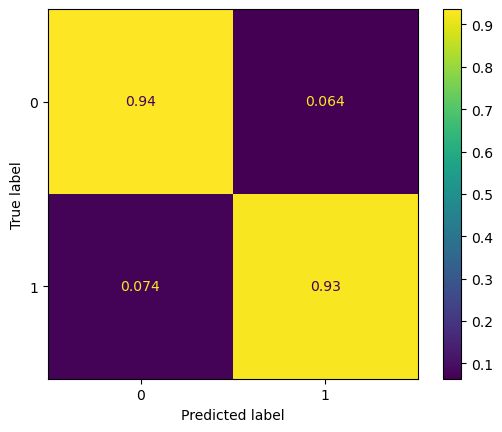

In [123]:
ConfusionMatrixDisplay.from_predictions(y_test , y_pred,normalize='true')

Unbalanced Dataset

In [124]:
#abc = AdaBoostClassifier()
#abc.fit(X_train,y_train)
#y_pred = (abc.predict(X_test)>0.5)
#ConfusionMatrixDisplay.from_predictions(y_test , y_pred)

#### GridSearch

In [125]:
abc = AdaBoostClassifier()

In [126]:
n_estimators=[64, 100]
param_grid = {'n_estimators':[50,64,100,128]}

In [127]:
grid_abc = GridSearchCV(abc,param_grid)

In [128]:
grid_abc.fit(X_res,y_res)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'n_estimators': [50, 64, 100, 128]})

In [129]:
grid_abc.best_params_

{'n_estimators': 128}

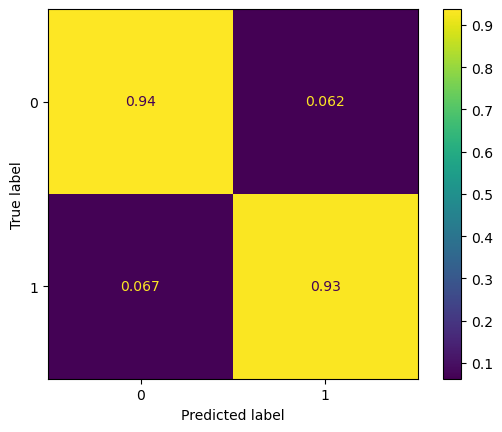

In [130]:
ConfusionMatrixDisplay.from_estimator(grid_abc,X_test,y_test,normalize='true')

# VotingClassifier 

In [ ]:
from sklearn.ensemble import VotingClassifier

### Custom activation function for Dense Layer

Voting classifier expects all models to have binary output

In [ ]:
import tensorflow as tf

In [ ]:
#Custom an activation parameter for the last layer of the ANN 
def binary_activation(x):
    return tf.where(x > 0.5, 1.0, 0.0)

In [ ]:
from keras.utils.generic_utils import get_custom_objects

In [ ]:
get_custom_objects().update({'binary_activation': Activation(binary_activation)})

In [ ]:
binary_activation(0.8)

In [ ]:
from keras.layers import Activation

In [ ]:
ann = Sequential()
ann.add(Dense(30,activation = 'relu',input_shape = (30,)))
ann.add(Dropout(0.2))
ann.add(Dense(64,activation = 'relu'))
ann.add(Dropout(0.2))
ann.add(Dense(128,activation = 'relu'))
#ann.add(Dense(1,activation = 'sigmoid',name = 'yac'))
ann.add(Dense(1,activation = binary_activation))

In [ ]:
ann.compile(optimizer = 'adam' ,loss = 'binary_crossentropy', metrics= ['accuracy'])

In [ ]:
#ann.layers[-1].trainable = False

In [ ]:
ann.fit(X_res,y_res)

In [ ]:
y_pred = ann.predict(X_test)

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test , y_pred)

In [ ]:
from keras.models import Model

In [ ]:
layer_name = 'yac'
intermediate_layer_model = Model(inputs=ann.input, outputs=ann.get_layer(layer_name).output)

In [ ]:
intermediate_output = intermediate_layer_model.predict(X_test)

In [ ]:
intermediate_output.max()

In [ ]:
y_pred

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test , y_pred)

In [ ]:
# Custom classifier wrapper for the ANN model
class ANNWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, model, threshold=0.5):
        self.model = model
        self.threshold = threshold

    def fit(self, X, y):
        self.model.fit(X, y)
        return self

    def predict(self, X):
        y_pred_prob = self.model.predict(X)
        y_pred_binary = (y_pred_prob >= self.threshold).astype(int)
        return y_pred_binary

    def predict_proba(self, X):
        return self.model.predict(X)

# Assuming you have created your feature matrix 'X' and target vector 'y'
# Also, you have split the data into training and testing sets: X_train, X_test, y_train, y_test

# Define the ANN model
ann = Sequential()
ann.add(Dense(30, activation='relu', input_shape=(30,)))
ann.add(Dropout(0.2))
ann.add(Dense(64, activation='relu'))
ann.add(Dropout(0.2))
ann.add(Dense(128, activation='relu'))
ann.add(Dense(1, activation='sigmoid'))

# Compile the model
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
ann.fit(X_res, y_res, epochs=10, batch_size=32)

# Create the ANNWrapper instance with the ANN model and threshold
ann_wrapper = ANNWrapper(model=ann, threshold=0.5)




In [ ]:
#Logistic
log = LogisticRegression(C = 1.0, class_weight = 'balanced', l1_ratio = 1, penalty = None)

In [ ]:
#Random_Forest
rfc = RandomForestClassifier(n_estimators = 100,
             max_features = 5)

In [ ]:
#ANN
ann = Sequential()
ann.add(Dense(30,activation = 'relu',input_shape = (30,)))
ann.add(Dropout(0.2))
ann.add(Dense(64,activation = 'relu'))
ann.add(Dropout(0.2))
ann.add(Dense(128,activation = 'relu'))
ann.add(Dense(1,activation = 'sigmoid'))

In [ ]:
#AdaBoostClassifier
abc = AdaBoostClassifier()

In [ ]:
estimators = [('Logistic' , best_log) ,( 'Random Forest', rfc ) ,('AdaBoost',abc)]

In [ ]:
vote_model = VotingClassifier(estimators = estimators , voting = 'hard')

In [ ]:
vote_model.fit(X_res,y_res)

In [ ]:
y_pred = vote_model.predict(X_test)

In [ ]:
ConfusionMatrixDisplay.from_estimator(vote_model ,X_test , y_test)